In [12]:
import json
import io 
import IPython.display
import os 
import base64
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [13]:
fp = io.open('/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/GH_Data/11_11_16/Part7_Draw.json')
d = json.load(fp)
print len(d)
dd = d[0]
# print(dd. keys())
print(dd['image'])
img_shape = dd['image'] # source image
jpeg_img = dd['jpeg'] # generated image
with open('/Users/cocosci/Desktop/ray_jpeg_test.jpg', 'wb') as wf:
    wf.write(jpeg_img)
# img = base64.b64decode(jpeg_img)
# # print(img)
# np_img = np.fromstring(img, dtype=np.uint8)
# np_img = np_img.reshape(img_shape)
# print(np_img.shape)
# imshow(np_img)

#Ray added
# print d
# print len(d)
# print(d[1])
#print(d[0].keys())
#print(d[0]['jpeg'])
#IPython.display.display(IPython.display.Image(d[0]['jpeg']))


8
https://s3.amazonaws.com/lakecharacter/Omniglot_letters/Drawcopy/handwritten40.png


In [14]:
def getdata(f):
    fp = io.open(f)
    return json.load(fp)

In [15]:
t = d[2][u'strokes'][0]

[{u'y': 306, u'x': 256, u't': u'2016-11-10T17:13:10.424Z'}, {u'y': 313, u'x': 257, u't': u'2016-11-10T17:13:10.47Z'}, {u'y': 321, u'x': 260, u't': u'2016-11-10T17:13:10.488Z'}, {u'y': 339, u'x': 264, u't': u'2016-11-10T17:13:10.503Z'}, {u'y': 358, u'x': 268, u't': u'2016-11-10T17:13:10.52Z'}, {u'y': 379, u'x': 272, u't': u'2016-11-10T17:13:10.537Z'}, {u'y': 397, u'x': 277, u't': u'2016-11-10T17:13:10.553Z'}, {u'y': 413, u'x': 282, u't': u'2016-11-10T17:13:10.571Z'}, {u'y': 427, u'x': 289, u't': u'2016-11-10T17:13:10.587Z'}, {u'y': 436, u'x': 301, u't': u'2016-11-10T17:13:10.605Z'}, {u'y': 440, u'x': 316, u't': u'2016-11-10T17:13:10.62Z'}, {u'y': 441, u'x': 338, u't': u'2016-11-10T17:13:10.636Z'}, {u'y': 427, u'x': 362, u't': u'2016-11-10T17:13:10.653Z'}, {u'y': 401, u'x': 390, u't': u'2016-11-10T17:13:10.669Z'}, {u'y': 372, u'x': 415, u't': u'2016-11-10T17:13:10.686Z'}, {u'y': 339, u'x': 435, u't': u'2016-11-10T17:13:10.703Z'}, {u'y': 307, u'x': 453, u't': u'2016-11-10T17:13:10.721Z'},

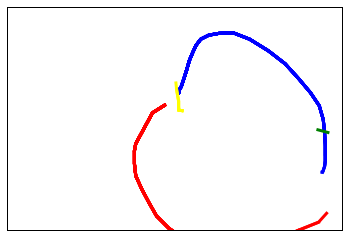

In [16]:
def getx(p):
    
    return p[u'x']

def gety(p):
    return p[u'y']

def plotstroke(onestroke,onecolor):
    print onestroke
    xs = map(getx,onestroke)
    ys = map(gety,onestroke)
    ## draw dots where the child's touched the screen up to now
    ySizeOfImage = 500
    xSizeOfImage = 500
    plot(xs,ys, 
      lw = 3, color = onecolor)
    axis('off')
    yticks([])
    xticks([])
    xlim(0,xSizeOfImage)
    ylim(0,ySizeOfImage)

#ray
def plotstroke_new(ax,onestroke,onecolor,file_ind):
    print onestroke
    xs = map(getx,onestroke)
    ys = map(gety,onestroke)
    ySizeOfImage = 500
    xSizeOfImage = 500
    assert(len(xs) == len(ys))
    for i in range(len(xs)):
        x, y = xs[:i], ys[:i]
        ax.plot(x,y,lw=3, color=onecolor)
#         yticks([])
#         xticks([])
#         xlim(0,xSizeOfImage)
#         ylim(0,ySizeOfImage)
#         show()
#        savefig('/Users/cocosci/Desktop/ray_out/%02d_%03d_%s' %(file_ind, i, onecolor))
# this works below 
        savefig('/Users/cocosci/Desktop/ray_out/image%02d_%03d' %(file_ind, i))
#        savefig('/Users/cocosci/Desktop/ray_out/image%02d' %(i)) 

def flatList(l):
    return [item for sublist in l for item in sublist]

directoryToImages = "/Users/cocosci/Desktop/ray_out/"

def makeimage(letter,filename):

    strokeColors = ["blue","red","green","yellow","magenta","black"]
    strokes = letter[u'strokes']
    f = figure() # ray
    ax = f.gca() # ray
    yticks([])
    xticks([])
    xlim(0,500)
    ylim(0,500)
    allX = []
    allY = []
    for i in range(len(strokes)):
        color = strokeColors[i]
        stroke = strokes[i]
        xs = map(getx, stroke)
        ys = map(gety, stroke)
        allX.append(xs)
        allY.append(ys)
#         plotstroke(stroke,color)
        plotstroke_new(ax, stroke,color,i) # ray
#         show()
    allX = flatList(allX)
    allY = flatList(allY)
    jointXY = array([allX, allY]).transpose()
    savetxt(directoryToImages + "data.csv", jointXY, delimiter=",")
    savefig(filename)
        
        
makeimage(d[2],'/Users/cocosci/Dropbox (MIT)/LETTERS_JBT/Final expereiment/testek.png')        

    


In [17]:
#Makes movie and gif
directoryToImages = "/Users/cocosci/Desktop/ray_out/"
os.system("ffmpeg -framerate 30 -pattern_type glob -i '" + directoryToImages + \
           "*.png' -c:v libx264 -pix_fmt yuv420p " + directoryToImages + "out.mp4")

os.system("convert -delay 1.5 " + directoryToImages +  \
           "/*.png " + directoryToImages + "tout.gif")

0

In [ ]:
#onestroke = d[3]['strokes'][0]
#map(getx,onestroke)
locals()

In [6]:
whos

Variable         Type             Data/Info
-------------------------------------------
IPython          module           <module 'IPython' from '/<...>es/IPython/__init__.pyc'>
d                list             n=8
flatList         function         <function flatList at 0x106f87668>
fp               TextIOWrapper    <_io.TextIOWrapper name='<...>w.json' encoding='UTF-8'>
getdata          function         <function getdata at 0x106f87398>
getx             function         <function getx at 0x106f87500>
gety             function         <function gety at 0x106f877d0>
io               module           <module 'io' from '/Users<...>a2/lib/python2.7/io.pyc'>
json             module           <module 'json' from '/Use<...>on2.7/json/__init__.pyc'>
makeimage        function         <function makeimage at 0x106f878c0>
os               module           <module 'os' from '/Users<...>a2/lib/python2.7/os.pyc'>
plotstroke       function         <function plotstroke at 0x106f87848>
plotstroke_new  